# Supervised Learning with Scikit learn

## 1. Classification 

**Supervised learning** has 2 categories: classification and regression.

Classification is in charge of predicting categorical values. E.g an email being spam or not, for this we use _binary classification_.

An example of a binary classifier:

In [13]:
# import data from the csv file and turn into panda df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the csv file
churn_df = pd.read_csv('./data/Telecom_Churn_Clean.csv')

# print the first 5 rows of the dataframe
#print(df.head())

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# predict with new data
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 


Predictions: [0 1 0]


But how can we test our model against new data points? We split the data into 2 sets: **training and testing data**. Testing data is usually 20%-30%.

After this we can test the model's accuracy.

In [14]:
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


To test our model isn't overfitting -- fitting too much the dataset and this being bad at predicting. Or overfitting which is the opposite, we test our model with different `n_neighbors` values to test the model accuracy and complexity.

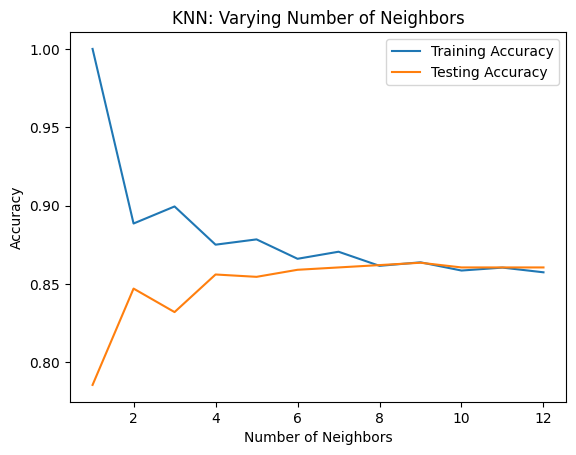

In [17]:
# 1. Test against over and under fitting
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
#print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# 2. and visualize that
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## 2. Regression